<a href="https://colab.research.google.com/github/KunChen-tw/DeepLearning/blob/main/deeplearning1005_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example: Iris classification

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import torch
torch.manual_seed(42)
np.random.seed(40)

# 鳶尾花
dataset = datasets.load_iris()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.values,dataset.target, test_size=0.2)

y_train_encoding = pd.get_dummies(y_train)
y_test_encoding = pd.get_dummies(y_test)

# To PyTorch Tensor
X_train = torch.FloatTensor(X_train)
y_train_encoding = torch.FloatTensor(y_train_encoding.values)
X_test = torch.FloatTensor(X_test)
y_test_encoding = torch.FloatTensor(y_test_encoding.values)
print(X_train.shape, y_train_encoding.shape)


torch.Size([120, 4]) torch.Size([120, 3])


In [3]:
import pandas as pd
# Build a DataFrame
data = { 'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'] }
df = pd.DataFrame(data)
print(df)
# use pd.get_dummies() to transfer 'Color’ column
dummies = pd.get_dummies(df['Color'])
print(dummies)


   Color
0    Red
1   Blue
2  Green
3   Blue
4    Red
    Blue  Green    Red
0  False  False   True
1   True  False  False
2  False   True  False
3   True  False  False
4  False  False   True


In [4]:
model = torch.nn.Sequential(
    torch.nn.Linear(4, 3),
    torch.nn.Softmax(dim=1)
)
loss_function = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs=10000
accuracy = []
losses = []
for i in range(epochs):
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train_encoding)
    accuracy.append((np.argmax(y_pred.detach().numpy(), axis=1) == y_train)
                    .sum()/y_train.shape[0]*100)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100 == 0:
        print(loss.item())


74.38209533691406
29.350936889648438
17.313980102539062
12.204937934875488
9.689881324768066
8.243370056152344
7.317575931549072
6.679239749908447
6.214489936828613
5.861813545227051
5.585333824157715
5.362840175628662
5.179901599884033
5.02677059173584
4.896634101867676
4.784600734710693
4.687069892883301
4.6013383865356445
4.52532958984375
4.4574360847473145
4.396381855010986
4.341151714324951
4.290925025939941
4.245026111602783
4.202902793884277
4.164092540740967
4.128210544586182
4.0949296951293945
4.063972473144531
4.03510046005249
4.008111476898193
3.98283052444458
3.9591031074523926
3.936795711517334
3.915792226791382
3.895988941192627
3.8772969245910645
3.8596301078796387
3.8429200649261475
3.827104091644287
3.8121187686920166
3.797912120819092
3.7844398021698
3.7716546058654785
3.7595162391662598
3.747986078262329
3.737032890319824
3.726621389389038
3.716721534729004
3.707303285598755
3.6983437538146973
3.6898131370544434
3.6816883087158203
3.673945665359497
3.6665608882904053

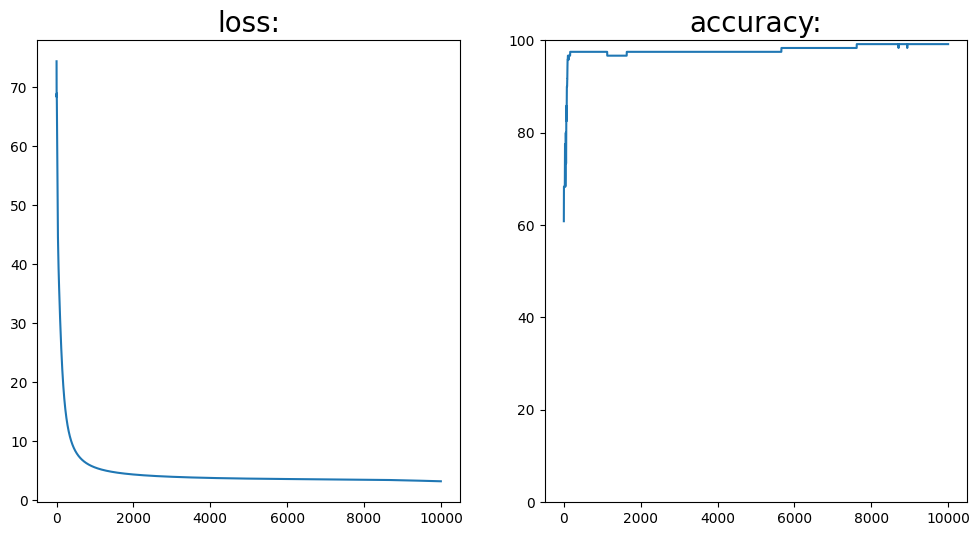

test data accuracy: 1.00


In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('loss:', fontsize=20)
plt.plot(range(0,epochs), losses)

plt.subplot(1,2,2)
plt.title('accuracy:', fontsize=20)
plt.plot(range(0,epochs), accuracy)
plt.ylim(0,100)
plt.show()

predict_test = model(X_test)
_, y_pred = torch.max(predict_test, 1) # 因為只需要 y 的預測，但同時有 x 和 y 資料，可用底線 _, ypred 表示不存 x 的資料


print(f'test data accuracy: {((y_pred.numpy() == y_test).sum()/y_test.shape[0]):.2f}')
